# Homework 3
## Package Import and Data Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score, euclidean_distances
import warnings
warnings.filterwarnings('ignore')
X = pd.read_csv('wines.csv')
X = (X - X.mean())/X.std()

## Question 1
*Do a PCA on the data. How many Eigenvalues are above 1? Plotting the 2D solution (projecting the data on the first 2 principal components), how much of the variance is explained by these two dimensions, and how would you interpret them?*

Eigenvalues:
 [4.70585025 2.49697373 1.44607197 0.91897392 0.85322818 0.64165703
 0.55102831 0.34849736 0.28887994 0.25090248 0.22578864 0.16877023
 0.10337794]

The number of eigenvalues that are above 1: 3 



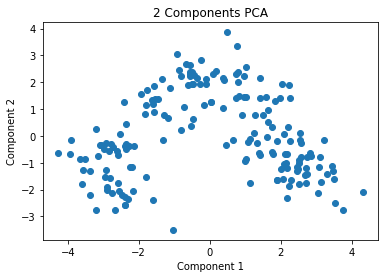


Ratio of the variance that is explained by these two dimensions:         [0.36198848 0.1920749 ]
Ratio of the variance that is explained by these two dimensions in total: 0.5540633835693525


In [90]:
PCA_model = PCA().fit(X)
print("Eigenvalues:\n", PCA_model.explained_variance_)
print("\nThe number of eigenvalues that are above 1:", len(PCA_model.explained_variance_[PCA_model.explained_variance_>1]),"\n")
X_PCA = PCA_model.transform(X)
plot = plt.scatter(X_PCA[:,0], X_PCA[:,1])
plt.ylabel('Component 2')
plt.xlabel('Component 1')
plt.title('2 Components PCA')
plt.show()
print('\nRatio of the variance that is explained by these two dimensions:        ', PCA_model.explained_variance_ratio_[0:2])
print('Ratio of the variance that is explained by these two dimensions in total:', sum(PCA_model.explained_variance_ratio_[0:2]))

* In the code, I first built a PCA model using all predictors from data. Then, I printed out the eigenvalues using model's attribute .explain_variance_. Then, I plotted out the 2D solution using the first 2 principal components, and printed out the ratio of the variance that is explained by these two dimensions.
* I did so in the code because I need both numeric and visualized results to count how many eigenvalues that are above 1 and interpret how much variance is explained, as these are asked in the question. 
* There are three eigenvalues above 1 among all the eigenvalues. There are in total 55.40633835693525% of the variance is explained by these two dimensions.
* The eigenvalues that are larger than 1 means that the principal component could explain one variable's worth of variability. That is to say, there is a high chance that there are three types of wines in the given data. The explained variance ratio indicates how much percent of variance that is belong to the selected components, which explains how much percent of the overall variability. The sum of ratio of variance of first two dimensions is 0.5540633835693525, which means about 55.40633835693525% of the overall variability is explained by the first two dimensions. I would not say this is a very good number. For a better model, more dimensions might need to be picked up.

## Question 2
*Use t-SNE on the data. How does KL-divergence depend on Perplexity (vary Perplexity from 5 to 150)? Make sure to plot this relationship. Also, show a plot of the 2D component with a Perplexity of 20.*

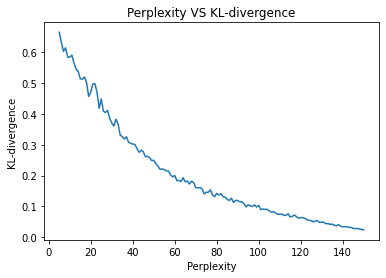

In [2]:
perplexity_kl = np.zeros(shape=(146,2))
for i in range(5, 151):
    X_TSNE = TSNE(n_components=2, perplexity=i).fit(X)
    perplexity_kl[i-5] = [i, X_TSNE.kl_divergence_]
plt.plot(perplexity_kl[:,0], perplexity_kl[:,1])
plt.ylabel('KL-divergence')
plt.xlabel('Perplexity')
plt.title('Perplexity VS KL-divergence')
plt.show()

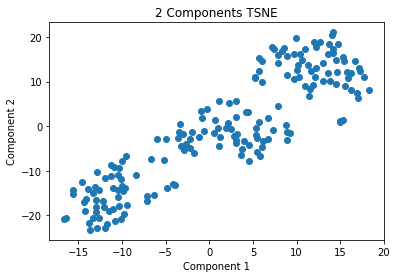

The KL-divergence of t-SNE is: 0.46467798948287964


In [3]:
X_TSNE_model = TSNE(n_components=2, perplexity=20, random_state = 10).fit(X)
X_TSNE = TSNE(n_components=2, perplexity=20, random_state = 10).fit_transform(X)
plt.scatter(X_TSNE[:,0], X_TSNE[:,1])
plt.ylabel('Component 2')
plt.xlabel('Component 1')
plt.title('2 Components TSNE')
plt.show()
print("The KL-divergence of t-SNE is:", X_TSNE_model.kl_divergence_)

In [4]:
X_TSNE

array([[  7.156223  ,  17.87595   ],
       [  8.896203  ,  11.465104  ],
       [ 15.4861965 ,  14.572415  ],
       [ 12.686814  ,  18.968697  ],
       [ 16.274246  ,   8.044689  ],
       [ 13.674084  ,  18.352755  ],
       [ 11.294328  ,  13.829525  ],
       [ 15.883681  ,  10.799646  ],
       [ 10.671464  ,  14.790608  ],
       [ 10.340795  ,  16.231283  ],
       [ 13.603661  ,  16.210747  ],
       [ 11.627781  ,  12.404234  ],
       [ 12.266033  ,  13.058122  ],
       [ 14.1126175 ,  21.08382   ],
       [ 14.046104  ,  20.396574  ],
       [ 15.765038  ,  12.228501  ],
       [ 17.172976  ,  13.001509  ],
       [ 17.209976  ,  12.404621  ],
       [ 14.783229  ,  18.461582  ],
       [  5.9817367 ,  14.691605  ],
       [  7.413645  ,  17.433266  ],
       [  6.0460434 ,   9.807613  ],
       [  9.99713   ,  12.709865  ],
       [ 11.875713  ,   9.22322   ],
       [ 11.559891  ,   8.390389  ],
       [ 16.938572  ,   7.462758  ],
       [ 13.628215  ,  11.855074  ],
 

* In the first section of the code, I plotted out the KL-divergence vs perplexity as perplexity increases. In the second section of the code. I built a model with perplexity equal to 20 and plotted it out.
* I did so because I would be able to observe how KL-divergence changes as perplexity increases. I also would be able to observe how model performed with perplexity equal to 20.
* There is a relationship that when perplexity increases, KL-divergence decreases. The t-SNE model with perplexity 20 is shown as above.
* KL-divergence is a factor to evaluate the performance of the model as t-SNE tries to minimize the sum of KL-divergence, smaller values of KL-divergence indicate better result. However, I do not think this idea is correct all the time as the KL vs perplexity model already shows that KL-divergence could monotonically decreases as perplexity increases. Based on my research, perplexity increases with the variance of the Gaussian used to calculate the P in KL-divergence formula. When the variance of the Gaussian increases, P decreases, and KL-divergence decreases. This explains why there is such a relationship. Thus, I will need to be cautious with the perplexity values when comparing different models. It will be more meaningful to set perplexity unchanged and tune other hyperparameters then tune the perplexity. Meanwhile, the t-SNE model with perplexity equal to 20 has a more clear observation of three clusters.

## Question 3
*Use MDS on the data. Try a 2-dimensional embedding. What is the resulting stress of this embedding? Also, plot this solution and comment on how it compares to t-SNE.*

In [17]:
mds = MDS(n_components=2, n_init=100, random_state = 10).fit(X)
points = mds.embedding_
similarities = euclidean_distances(X)
DE = euclidean_distances(points)
stress = 0.5 * np.sum((DE - similarities)**2)
stress1 = np.sqrt(stress /(0.5 * np.sum(similarities**2)))
print("The stress of this embedding is:", stress1)

The stress of this embedding is: 0.22597381580254908


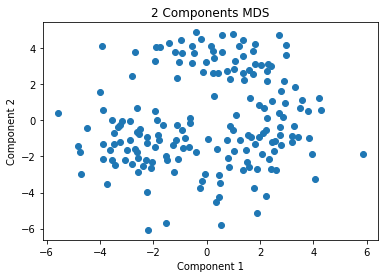

In [88]:
X_MDS = MDS(n_components=2, n_init=100, random_state = 10).fit_transform(X)
plt.scatter(X_MDS[:,0], X_MDS[:,1])
plt.ylabel('Component 2')
plt.xlabel('Component 1')
plt.title('2 Components MDS')
plt.show()

* In the first section of code, I built a MDS model and calculated its stress. In the second section of code, I plotted out this model. 
* The attribute .stress_ is not able to give a value between 0-1; instead, it gives a huge number over 20000. Thus, I did the calculation manually. Then, I plotted the model so that I would be able to interpret it and compare it with t-SNE model.
* The stress of this embedding is 0.22597381580254908. The visualized model is shown as above.
* Stress between 0.1-0.199 indicates a fair goodness of fit. In this question, the best stress value I could get is 0.22597381580254908 which is not a good number, no matter how I tune the hyperparameter or use different method to normalize the dataset. I think MDS is not a good choice for this dataset as it performed badly. The visualized model does not have a clear shape of clusters compared to t-SNE. Therefore, I would say t-SNE is a better choice compared to MDS.

## Question 4
*Building on one of the dimensionality reduction methods above that yielded a 2D solution (1-3, your choice), use the Silhouette method to determine the optimal number of clusters and then use kMeans with that number (k) to produce a plot that represents each wine as a dot in a 2D space in the color of its cluster. What is the total sum of the distance of all points to their respective clusters centers, of this solution?*

In [2]:
X_TSNE = TSNE(n_components=2, perplexity=20, random_state = 10).fit_transform(X)
for n_clusters in range(2, 6):
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_TSNE)
    silhouette_avg = silhouette_score(X_TSNE, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.56486535
For n_clusters = 3 The average silhouette_score is : 0.61089176
For n_clusters = 4 The average silhouette_score is : 0.5206118
For n_clusters = 5 The average silhouette_score is : 0.4382293


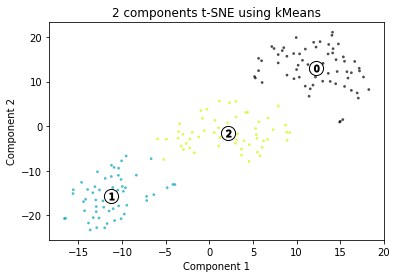

In [85]:
clusterer = KMeans(n_clusters=3, random_state=10)
clusterer_labels = clusterer.fit_predict(X_TSNE)
centers = clusterer.cluster_centers_
colors = cm.nipy_spectral(clusterer_labels.astype(float) / 3)
plt.scatter(X_TSNE[:, 0], X_TSNE[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")
plt.scatter(centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200,edgecolor="k")
for i, c in enumerate(centers):
    plt.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
plt.title('2 components t-SNE using kMeans' )
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [87]:
total_distance = 0
for i in KMeans(n_clusters=3, random_state=10).fit(X_TSNE).transform(X_TSNE):
    total_distance += min(i)
print("The total sum of the distance of all points to their respective clusters centers, of this solution is:",total_distance)


The total sum of the distance of all points to their respective clusters centers, of this solution is: 855.6779996007681


* In the first section of the code, I tried different number of clusters from 2 to 5, and calculated different silhouette scores. In the second section of the code, I used kMeans with the cluster number with the best silhouette score to produce a plot built on t-SNE that represents each wine as a dot in a 2D space in the color of its cluster. In the third section, I calculate the total sum of the distance of all points to their respective clusters centers, of this solution.
* I need to know the appropriate number of clusters before applying kMeans. And use it to make a plot that can correctly represent clusters. Then, to find the total sum of the distance, I used .tranform() method to find each points' distances toward each clusters, and added up the minimum distances to get the total distance of this solution.
* The best silhouette score occurs when cluster number is 3. The plot using cluster number equal to 3 looks make sense. The total distance is 855.6779996007681.
* The higher the silhouette score, the better the kMeans will perform. The maximum silhouette score occurs when cluster number is equal to 3. Therefore, it is appropraite to use kMeans with cluster number equal to 3, and the plot looks make sense applying what I got. The KMeans algorithm calculates the distance from points to each clusters and classifies the point using the smallest distance. For this question, there are three clusters, so for each points, .transform() method will return three distances from the point to three clusters. Therefore, the minimum value of the three distances is the distance between the point and its cluster, and adding each minimum values up will give us the total sum of the distance of all points to their respective clusters centers, of this solution.

## Question 5
*Building on one of the dimensionality reduction methods above that yielded a 2D solution (1-3, your choice), use dBScan to produce a plot that represents each wine as a dot in a 2D space in the color of its cluster. Make sure to suitably pick the radius of the perimeter (“epsilon”) and the minimal number of points within the perimeter to form a cluster (“minPoints”) and comment on your choice of these two hyperparameters.*

In [55]:
## DBSCAN Algorithm
def region_query (p, eps, X):
    # These lines check that the inputs `p` and `X` have
    # the right shape.
    _, dim = X.shape
    assert (p.shape == (dim,)) or (p.shape == (1, dim)) or (p.shape == (dim, 1))
    
    ### BEGIN SOLUTION
    return np.linalg.norm (p - X, axis=1) <= eps
    ### END SOLUTION

def index_set (y):
    """
    Given a boolean vector, this function returns
    the indices of all True elements.
    """
    assert len (y.shape) == 1

    ### BEGIN SOLUTION
    return set (np.where (y)[0])
    ### END SOLUTION

def find_neighbors (eps, X):
    m, d = X.shape
    neighbors = [] # Empty list to start
    ### BEGIN SOLUTION
    for i in range (len (X)):
        n_i = index_set (region_query (X[i, :], eps, X))
        neighbors.append (n_i)
    ### END SOLUTION
    assert len (neighbors) == m
    return neighbors

def find_core_points (s, neighbors):
    assert type (neighbors) is list
    assert all ([type (n) is set for n in neighbors])
    
    core_set = set ()
    ### BEGIN SOLUTION
    for i, n_i in enumerate (neighbors):
        if len (n_i) >= s:
            core_set.add (i)
    ### END SOLUTION
    return core_set

def expand_cluster (p, neighbors, core_set, visited, assignment):
    # Assume the caller performs Steps 1 and 2 of the procedure.
    # That means 'p' must be a core point that is part of a cluster.
    assert (p in core_set) and (p in visited) and (p in assignment)
    
    reachable = set (neighbors[p])  # Step 3
    while reachable:
        q = reachable.pop () # Step 4
        
        # Put your reordered and correctly indented statements here:
        ### BEGIN SOLUTION
        if q not in visited:
            visited.add (q) # Mark q as visited
            if q in core_set:
                reachable |= neighbors[q]
        if q not in assignment:
            assignment[q] = assignment[p]
        ### END SOLUTION
        
    # This procedure does not return anything
    # except via updates to `visited` and
    # `assignment`.
    
def dbscan (eps, s, X):
    clusters = []
    point_to_cluster = {}
    
    neighbors = find_neighbors (eps, X)
    core_set = find_core_points (s, neighbors)
    
    assignment = {}
    next_cluster_id = 0

    visited = set ()
    for i in core_set: # for each core point i
        if i not in visited:
            visited.add (i) # Mark i as visited
            assignment[i] = next_cluster_id
            expand_cluster (i, neighbors, core_set,
                            visited, assignment)
            next_cluster_id += 1

    return assignment, core_set

def make_scatter_plot (df, x="x_1", y="x_2", hue="label",
                       palette={0: "red", 1: "olive", 2: "blue", 3: "green"},
                       size=5,
                       centers=None):
    if (hue is not None) and (hue in df.columns):
        sns.lmplot (x=x, y=y, hue=hue, data=df, palette=palette,
                    fit_reg=False)
    else:
        sns.lmplot (x=x, y=y, data=df, fit_reg=False)

    if centers is not None:
        plt.scatter (centers[:,0], centers[:,1],
                     marker=u'*', s=500,
                     c=[palette[0]])

def make_scatter_plot2 (df, x="x_1", y="x_2", hue="label", size=5):
    if (hue is not None) and (hue in df.columns):
        sns.lmplot (x=x, y=y, hue=hue, data=df,
                    fit_reg=False)
    else:
        sns.lmplot (x=x, y=y, data=df, fit_reg=False)

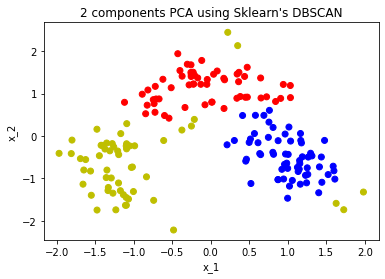

In [84]:
X_pca = PCA(n_components=2, whiten=True).fit_transform(X)
db = DBSCAN(eps=0.5, min_samples=16).fit(X_pca)
colors = list(map(lambda x: 'r' if x == 1 else ('b' if x == 0 else 'y'), db.labels_))
plt.scatter(X_pca[:,0], X_pca[:,1], c=colors)
plt.title('2 components PCA using Sklearn\'s DBSCAN' )
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

Number of core points: 103
Number of clusters: 3
Number of unclassified points: 9


Text(0.5, 1.0, "2 components PCA using Lab's DBSCAN")

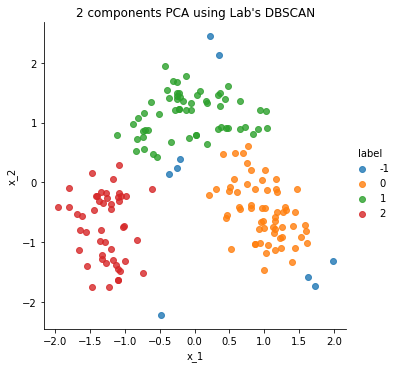

In [80]:
X_pca = PCA(n_components=2, whiten=True).fit_transform(X)
assignment, core_set = dbscan (0.5, 16, X_pca)
print ("Number of core points:", len (core_set))
print ("Number of clusters:", max (assignment.values ())+1)
print ("Number of unclassified points:", len (X) - len (assignment))
def plot_labels (df, labels):
    df_labeled = df.copy ()
    df_labeled['label'] = labels
    make_scatter_plot2 (df_labeled)
labels = [-1] * len (X_pca)
for i, c in assignment.items ():
    labels[i] = c
X_pca_df = pd.DataFrame(X_pca).rename({0:"x_1",1:"x_2"}, axis = 1)
plot_labels(X_pca_df, labels)
plt.title('2 components PCA using Lab\'s DBSCAN' )

* The first section of code is from lab. In the second section of code, I used sklearn's dBScan algorithm and tuned hyperparameter on PCA model to represent each clusters; this part is only for double checking with the next section's lab algorithm. In the three section of code, I used lab dBScan algorithm and tuned hyperparameter on PCA model to represent each clusters.
* I need to suitably find epsilon and minPoints to have a reasonable plot, so I kept tuning them until there was a plot with reasonable number of unclassified points and number of clusters.
* When epsilon=0.5, minPoints=16, dBScan has the best application on PCA model, with 3 clusters, and 9 unclassified points.
* I found that keeping epsilon unchanged, decreasing minPoints will reduce the number unclassified points but make the overall plot tend to be a whole cluster, which is incorrect (there cannot be only one type of wine); increasing minPoints will increase the number of unclassified points. Keeping minPoints unchanged, decreasing epsilon will increase the number unclassified points, and increasing epsilon will decrease the number unclassified points but make the overall plot tend to be a whole cluster. Thus, tuning these two hyperparameter accordingly and following this trend, I had the result that when epsilon=0.5, minPoints=16, dBScan has the best application on PCA model, with 3 clusters, and 9 unclassified points. The plot looks reasonable and has the similar conclusion from the previous kMeans method.

## Extra A
*Given your answers to all of these questions taken together, how many different kinds of wine
do you think there are and how do they differ?*

* There are three kinds of wines.
* I think based on three different kinds of models and kMeans and dBScan, these three wines are different on a visible-to-the-naked-eye level. The differences are most obvious on t-SNE model, as there are clearly three clusters. The differences of PCA model and MDS model are less obvious, but there are still tendencies of three clusters.

## Extra B
Is there anything of interest you learned about wines from exploring this dataset with
unsupervised machine learning method that is worth noting and not already covered in the
questions above?

In [176]:
X_TSNE = TSNE(n_components=2, perplexity=20, random_state=0).fit(X)
columns_delta_KL = np.zeros(shape=(13,2))
dic_columns_delta_KL = {"Col Name":[], "Delta KL-divergence":[]}
print('{:72s}{:.5f}'.format("KL-divergence of t-SNE model with all columns included is:", X_TSNE.kl_divergence_))
for i in range(len(X.columns)):
    X_new = X.drop(X.columns[i], axis = 1)
    X_TSNE_new = TSNE(n_components=2, perplexity=20, random_state=0).fit(X_new)
    print('{:72s}{:.5f}'.format('KL-divergence of t-SNE model with {} dropped is: '.format(X.columns[i]), X_TSNE_new.kl_divergence_))
    dic_columns_delta_KL["Col Name"].append(X.columns[i])
    dic_columns_delta_KL["Delta KL-divergence"].append(format(X_TSNE.kl_divergence_-X_TSNE_new.kl_divergence_, '.4f'))
pd.DataFrame.from_dict(dic_columns_delta_KL).sort_values(by=["Delta KL-divergence"], ascending=False)

KL-divergence of t-SNE model with all columns included is:              0.46264
KL-divergence of t-SNE model with Alcohol dropped is:                   0.48155
KL-divergence of t-SNE model with Malic_Acid dropped is:                0.47476
KL-divergence of t-SNE model with Ash dropped is:                       0.46478
KL-divergence of t-SNE model with Ash_Alkalinity dropped is:            0.48620
KL-divergence of t-SNE model with Magnesium dropped is:                 0.47548
KL-divergence of t-SNE model with Total_Phenols dropped is:             0.49926
KL-divergence of t-SNE model with Flavonoids dropped is:                0.51078
KL-divergence of t-SNE model with Stilbenes dropped is:                 0.49690
KL-divergence of t-SNE model with Proanthocyanins dropped is:           0.51693
KL-divergence of t-SNE model with Color_Intensity dropped is:           0.47957
KL-divergence of t-SNE model with Hue dropped is:                       0.48178
KL-divergence of t-SNE model with OD280 

,Col Name,Delta KL-divergence
8,Proanthocyanins,-0.0543
6,Flavonoids,-0.0481
5,Total_Phenols,-0.0366
7,Stilbenes,-0.0343
12,Proline,-0.0264
3,Ash_Alkalinity,-0.0236
11,OD280,-0.0230
10,Hue,-0.0191
0,Alcohol,-0.0189
9,Color_Intensity,-0.0169


* In the code, I dropped each columns once and built TSNE models with different columns dropped and find their according KL-divergence. I set perplexity unchanged.
* I would like to see which column dropped would have the biggest influence toward the overall model performance. KL-divergence is a factor to evaluate TSNE model's performance. Therefore, comparing KL-divergence changes can tell which column has the biggest influence. That is to say, which predictor is the most important one to distinguish different types of wines.
* The ranking of KL-divergence drop is shown as above. The top five predictors are Proanthocyanins, Flavonoids, Total_Phenols, Stilbenes, and Proline.
* We can conclude that the most important predictors that help distinguish the differences of different types of wines are Proanthocyanins, Flavonoids, Total_Phenols, Stilbenes, and Proline.